# Dual beam zoneplate simulations
awojdyla@lbl.gov, March 2024


## Define the zoneplate
numerical aperture: 0.01NA
focal distance: 12mm
central stop: 95um
spot size: 110nm
spot separation: 10um

85nm outer ring radius (corrected for 700eV)
Diameter 240 microns
Au 200nm thick zones (3% transmission at 700eV, may be
thicker)

In [1]:
# importing functions manually so that we can import them from another package later
import numpy as np
from monoplus import divg, focus, fwhm, gaussfunc, polyfunc, propHF, propTF, secondmomt

In [2]:
focal_m = 12e-3
spot_sep_m = 10e-6
diameter_m = 240e-6
central_m = 95e-6
#  design photon energy
Ed_eV = 700
wavelength_m = 1234e-9/Ed_eV #hc/EV

p_m=1e9
q_m=focal_m
f_m= 1/(1/p_m+1/q_m)

NA = diameter_m/focal_m/2 
min_dx_m = wavelength_m/NA #mininum ring size

Dx_m = 1e-3
dx_m = 1e-9 #dx needs to be bigger (~10x)than min_dx_m unless 
# another condition for propagation: dx_m<avelength_m*z_m/Dx_m

x_m = np.linspace(-Dx_m/2,Dx_m/2, int(Dx_m/dx_m)+1)
foc_phase = np.exp(-1j*2*np.pi/(wavelength_m*2*f_m)*(x_m**2))



In [3]:
min_dx_m*1e9

176.28571428571425

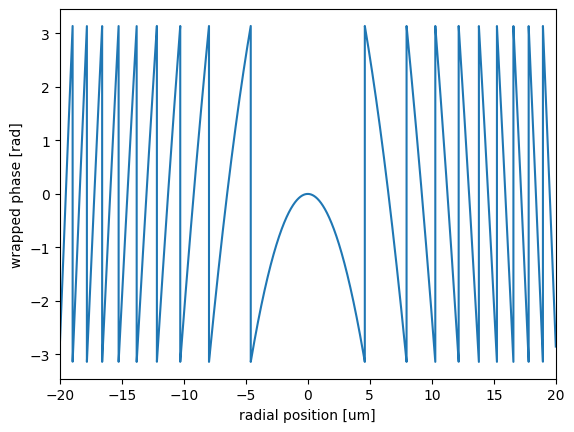

In [4]:
import matplotlib.pyplot as plt  
plt.plot(x_m*1e6,np.angle(foc_phase))
plt.xlabel('radial position [um]')
plt.ylabel('wrapped phase [rad]')
plt.xlim((-20,20))
plt.show()



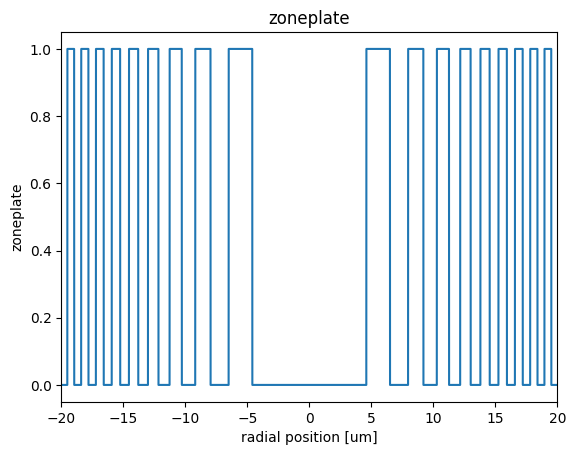

In [5]:
ZP = np.angle(foc_phase)>0
plt.plot(x_m*1e6,ZP)
plt.xlabel('radial position [um]')
plt.ylabel('zoneplate')
plt.title('zoneplate')
plt.xlim((-20,20))
plt.show()


## Propagate to focus

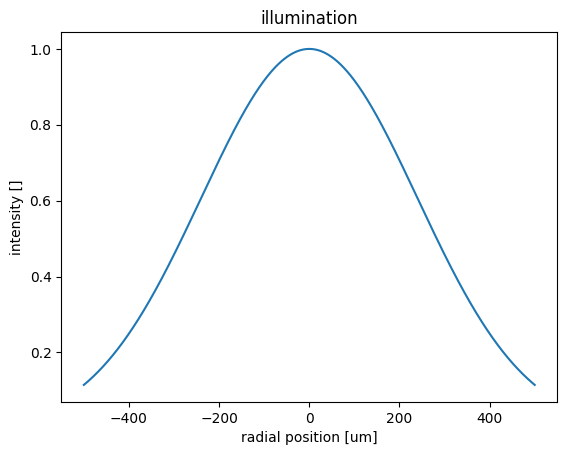

In [6]:
E0 = np.sqrt(gaussfunc(x_m,0,diameter_m)) #sqrt for amplitude
plt.plot(x_m*1e6,abs(E0)**2)
plt.xlabel('radial position [um]')
plt.ylabel('intensity []')
plt.title('illumination')
plt.show()

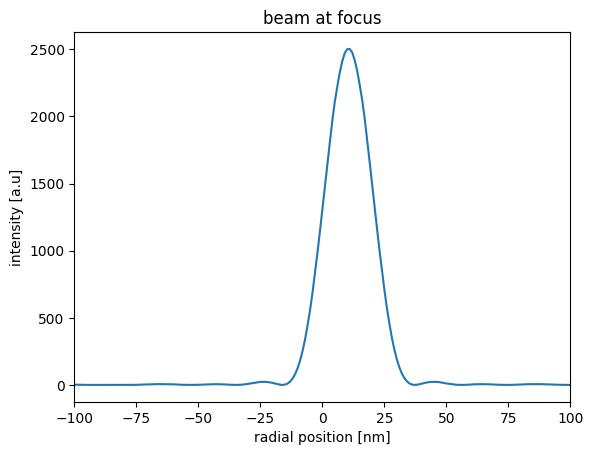

In [7]:
EZP = E0*ZP #sqrt for amplitude
Ef = propTF(EZP,Dx_m,wavelength_m,focal_m)
plt.plot(x_m*1e9,abs(Ef)**2)
plt.xlabel('radial position [nm]')
plt.ylabel('intensity [a.u]')
plt.title('beam at focus')
plt.xlim((-100,100))
plt.show()

In [8]:
theta_rad = (spot_sep_m/2)/focal_m

period_m     = wavelength_m/theta_rad

central_stop = abs(x_m) < central_m/2
grating      = (1+np.sign(np.sin(2*np.pi/period_m*x_m)))/2

DBZ = np.logical_xor(ZP,grating)*np.logical_not(central_stop)

#DZP = ZP*grating



## Propagate

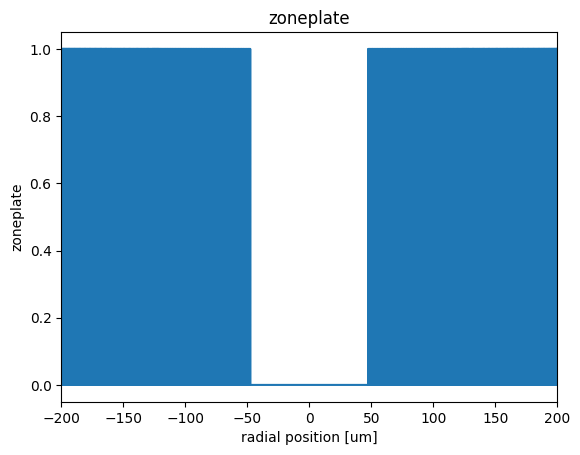

In [10]:
plt.plot(x_m*1e6,DBZ)
plt.xlabel('radial position [um]')
plt.ylabel('zoneplate')
plt.title('zoneplate')
plt.xlim((-200,200))
plt.show()

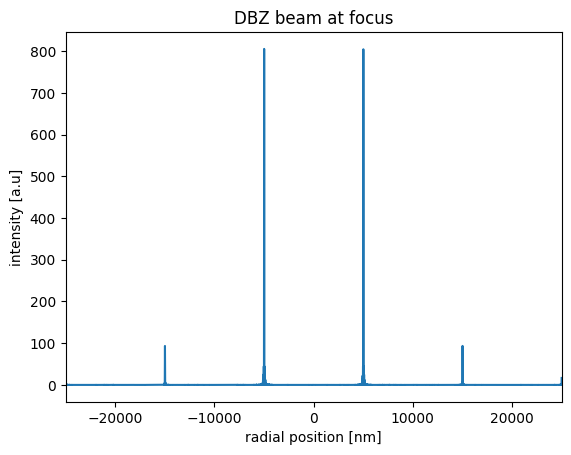

In [12]:
EDBZ = E0*DBZ #sqrt for amplitude
Ef_dbz = propTF(EDBZ, Dx_m, wavelength_m, focal_m)
plt.plot(x_m*1e9,abs(Ef_dbz)**2)
plt.xlabel('radial position [nm]')
plt.ylabel('intensity [a.u]')
plt.title('DBZ beam at focus')
plt.xlim((-25000,25000))

plt.show()

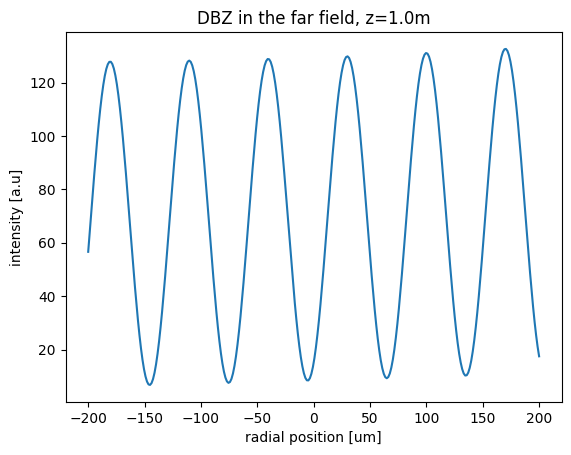

In [13]:
# need to use huygens fresnel here because
# dx_m<wavelength_m*z_m/Dx_m 

#propHF(xo_m, xi_m, Eo, k_1_m, z_m):
#k_1_m = 2 * np.pi/lambda_m

# limiting the input field (could be improved by masking around the fociis)
mask_focii = abs(x_m)<2.5*spot_sep_m/2
# far field coordinate
xff_m = np.linspace(-2e-4,2e-4,300)

z_m = 1
# not fast at all! ~1 sec per point
Edbz_ff = propHF(x_m[mask_focii], xff_m, Ef_dbz[mask_focii], 2*np.pi/wavelength_m, z_m)
plt.plot(xff_m*1e6,abs(Edbz_ff)**2)
plt.xlabel('radial position [um]')
plt.ylabel('intensity [a.u]')
plt.title('DBZ in the far field, z=%1.1fm'%z_m)
#plt.xlim((-10000,10000))
plt.show()